# Deliverable #1

The first deliverable that will serve as a practical activity for the first and second lessons; "The Perceptron" and "Neural Networks".

**Instructions**

- Download a multi-classification dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/) or any dataset repository. Then create a neural network model with two (2) hidden layers with ten (10) units each. 
- Also, explore by using Regularization techniques. Show the performance of the model using confusion matrix.
- Write a report containing two (2) sections describing the Dataset and the Classification Result. Submit the report file named as D1_LastName_FirstName.pdf and a zip file named as D1_LastName_FirstName.zip containing your code and the dataset.

## Imports

All needed libraries will be imported here.

Unless conditional, all imports must be done in this section to prevent workspace cluttering. Imports are sorted in an ascending manner, starting from "a" to "Z".

In [237]:

from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Data and Variable

Sets all the global data and variables here.

Global variables will be defined and instantiated in this section, preventing a confusing clutter down the line and allowing readability when revisions are needed.

### Instantiations

Instantiations of variables will be done here, preventing mixture of variable preview and definition.

In [238]:
data = {
    "train": pd.read_csv('data/optdigits.tra', header = None),
    "test": pd.read_csv('data/optdigits.tes', header = None)
}

split = {
    'train': {
        "x": None,
        "y": None
    },
    'test': {
        "x": None,
        "y": None
    },
}
"""
Container for the train and test data splits. It contains two keys:
- `train`: the training data split
- `test`: the test data split
"""

scaled = {
    'train': None,
    'test': None,
}
"""
Container for the scaled data. It contains two keys:
- `train`: the scaled training data
- `test`: the scaled test data
"""

labels = {
    'features': None,
    'target': None,
}
"""
Defines the labels for the features and target variable. It contains two keys:
- `features`: the feature labels (input variables)
- `target`: the target variable label (output variable)
"""

earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)
"""
Early stopping callback to prevent overfitting. It monitors the validation loss and stops training if it doesn't improve for a specified number of epochs (patience).
The best weights are restored after training.
"""

activationMethod = "softmax"
"""The activation method used in the output layer of the neural network. It is set to "softmax" for multi-class classification problems."""

None

### Previews

In [239]:
len(data["train"].columns)
print(f"Number of columns: {len(data["train"].columns)}")
print(f"Columns: {data["train"].columns.tolist()}")

Number of columns: 65
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [240]:
data["train"].head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Process

Here begins the process which includes data splitting and pre-processing,

### Splitting the Data

Data will be split into two with a split of 30 - 70% under the dictionary variable `split`.

In [241]:
split["train"] = {
    "x": data["train"].iloc[:, :-1],
    "y": data["train"].iloc[:, -1]
}

split["test"] = {
    "x": data["test"].iloc[:, :-1],
    "y": data["test"].iloc[:, -1]
}

print(f"Train data shape: {split["train"]["x"].shape}")
print(f"Test data shape: {split["test"]["x"].shape}")

Train data shape: (3823, 64)
Test data shape: (1797, 64)


### Creating the Model

#### Neural Network

In [242]:
model = tf.keras.Sequential()
shape = (split["train"]["x"].shape[1],)

print(f"Input shape: {shape}")

model.add(tf.keras.layers.Dropout(0.5, input_shape = shape))
model.add(tf.keras.layers.BatchNormalization())

Input shape: (64,)


c:\Users\Virus5600\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### Hidden Layers

Adding the two (2) hidden layers with ten (10) units each.

In [243]:
for i in range(2):
    print(f"Adding layer {i + 1}")
    model.add(tf.keras.layers.Dense(10, input_shape = shape, activation = "relu"))

Adding layer 1
Adding layer 2


c:\Users\Virus5600\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Output Layer

In [244]:
model.add(tf.keras.layers.Dense(10, activation = activationMethod))

##### Summary

In [245]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,126 (4.40 KB)

 Trainable params: 998 (3.90 KB)

 Non-trainable params: 128 (512.00 B)

In [246]:
plot_model(model, to_file = "tmp/model.png", show_shapes = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### Compiling and Training

In [247]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"],
)

In [248]:
split["train"]

{'x':       0   1   2   3   4   5   6   7   8   9   ...  54  55  56  57  58  59  60  \
 0      0   1   6  15  12   1   0   0   0   7  ...   0   0   0   0   6  14   7   
 1      0   0  10  16   6   0   0   0   0   7  ...   3   0   0   0  10  16  15   
 2      0   0   8  15  16  13   0   0   0   1  ...   0   0   0   0   9  14   0   
 3      0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   0   1  15   
 4      0   0   5  14   4   0   0   0   0   0  ...  12   0   0   0   4  12  14   
 ...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
 3818   0   0   5  13  11   2   0   0   0   2  ...  10   0   0   0   8  13  15   
 3819   0   0   0   1  12   1   0   0   0   0  ...   0   0   0   0   0   4   9   
 3820   0   0   3  15   0   0   0   0   0   0  ...   4   0   0   0   4  14  16   
 3821   0   0   6  16   2   0   0   0   0   0  ...  15   0   0   0   5  16  16   
 3822   0   0   2  15  16  13   1   0   0   0  ...   0   0   0   0   4  14   1   
 
       61

In [249]:
model.fit(
    split["train"]["x"],
    split["train"]["y"],
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [earlyStopping],
)

Epoch 1/100


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0989 - loss: 2.4002 - val_accuracy: 0.2078 - val_loss: 2.2192
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1797 - loss: 2.2340 - val_accuracy: 0.4248 - val_loss: 2.0670
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 2.0713 - val_accuracy: 0.5908 - val_loss: 1.7852
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3668 - loss: 1.8752 - val_accuracy: 0.6105 - val_loss: 1.4591
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4514 - loss: 1.6084 - val_accuracy: 0.6497 - val_loss: 1.2017
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4680 - loss: 1.4864 - val_accuracy: 0.6837 - val_loss: 1.0405
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5307 - loss: 1.3530 - val_accuracy: 0.7216 - val_loss: 0.9243
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 1.2678 - val_accuracy: 0.7621 - val_loss: 0.8

## Prediction

Test the model's prediction

In [250]:
y = {
    "pred": model.predict(split["test"]["x"]),
    "true": split["test"]["y"]
}

y["pred_classes"] = y["pred"].argmax(axis = -1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


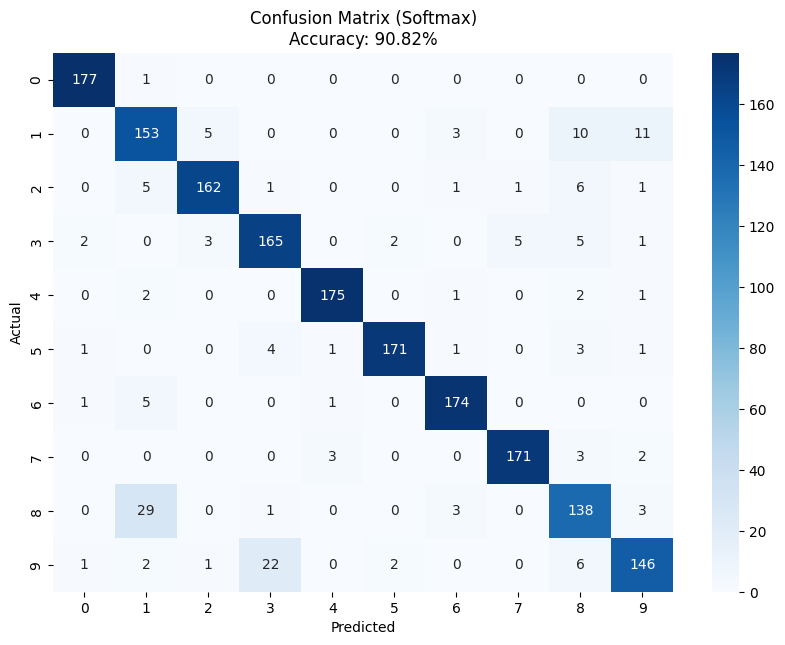

In [251]:
cm = confusion_matrix(y["true"], y["pred_classes"])
accuracy = f"{np.sum(y["pred_classes"] == y["true"]) / len(y["true"]) * 100:.2f}%"

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")

plt.title(f"Confusion Matrix ({activationMethod.title()})\nAccuracy: {accuracy}")
plt.xlabel("Predicted")
plt.ylabel("Actual")

if (os.path.exists(f"./outputs/{activationMethod}") == False):
    os.makedirs(f"./outputs/{activationMethod}")

plt.savefig(f"./outputs/{activationMethod}/{int(datetime.datetime.now().timestamp() * 1e6)} - {accuracy}.jpg")
plt.show()